In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from data import load_data, load_config

# slowdelta, fastdelta, slowtheta, fasttheta, alpha, beta, gamma, rms, mouseID, lab, sleepstage, epoch
config = load_config()
data_path = config['data_path']
df = load_data(data_path)
df.head()

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,1.0,1.0,3.0,1.0
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,1.0,1.0,3.0,2.0
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,1.0,1.0,3.0,3.0
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,1.0,1.0,1.0,6.0
4,0.090192,0.104901,0.644949,0.082334,0.065495,0.055760,0.209134,1.0,1.0,1.0,7.0


In [2]:
# unique id, L{lab},M{mouseID}
df['unique_id'] = df['lab'].astype(str) + '_' + df['mouseID'].astype(str)
df['unique_id'] = df['unique_id'].astype('category').cat.codes + 1
df.head()

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch,unique_id
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,1.0,1.0,3.0,1.0,1
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,1.0,1.0,3.0,2.0,1
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,1.0,1.0,3.0,3.0,1
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,1.0,1.0,1.0,6.0,1
4,0.090192,0.104901,0.644949,0.082334,0.065495,0.055760,0.209134,1.0,1.0,1.0,7.0,1


In [3]:
label = 'sleepstage'
features_EEG = ['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta']
features_EMG = ['rms']

EEG = df[features_EEG]
EMG = df[features_EMG]
y = df[label]

In [4]:
# Standardize the features by each unique_id
# EEG = np.log(EEG)
# EEG = EEG.groupby(df['unique_id']).transform(lambda x: x - x.mean())

In [5]:
df_new = pd.concat([EEG, EMG, y], axis=1)
df_new['unique_id'] = df['unique_id']
df_new.head()

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,sleepstage,unique_id
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,3.0,1
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,3.0,1
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,3.0,1
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,1.0,1
4,0.090192,0.104901,0.644949,0.082334,0.065495,0.055760,0.209134,1.0,1


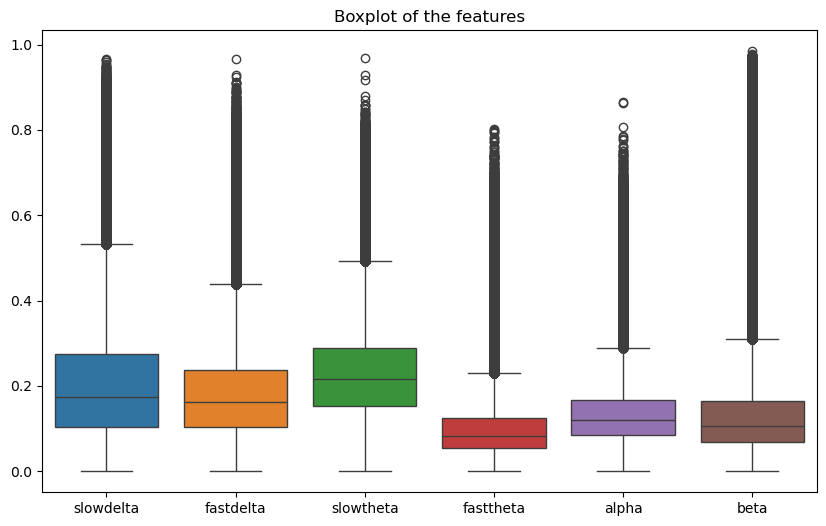

In [6]:
# boxplot of the features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=EEG)
plt.title('Boxplot of the features')
plt.show()

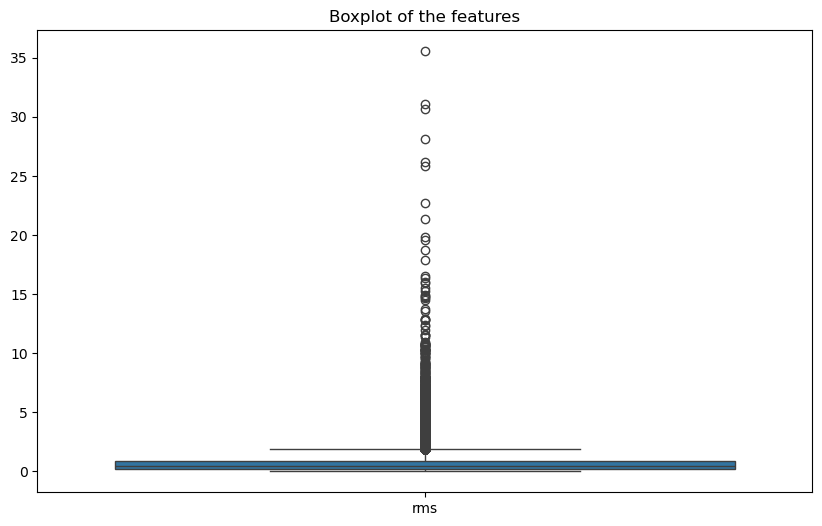

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=EMG)
plt.title('Boxplot of the features')
plt.show()

In [8]:
# show max for each feature
df_new.max()

slowdelta       0.967022
fastdelta       0.965986
slowtheta       0.968308
fasttheta       0.802020
alpha           0.864215
beta            0.984156
rms            35.554076
sleepstage      3.000000
unique_id     150.000000
dtype: float64

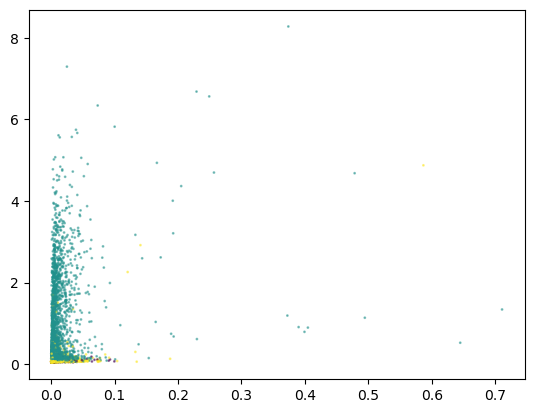

In [9]:
# Scatter plot of the log-(Delta/Theta) and the log-EMG for mouse 1
import matplotlib.pyplot as plt

mouse1 = df_new[df_new['unique_id'] == 25]
# plot fastdelta on x and rms on y
plt.scatter(mouse1['slowdelta'], mouse1['rms'], c=mouse1['sleepstage'], cmap='viridis', alpha=0.5, s=1)
plt.show()

In [10]:
# how many data points for each unique_id
for i in range(1,151):
    print(df_new[df_new['unique_id'] == i].shape)

(61786, 9)
(62870, 9)
(62292, 9)
(64338, 9)
(59084, 9)
(62145, 9)
(63741, 9)
(59791, 9)
(63736, 9)
(59751, 9)
(6300, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(5400, 9)
(21578, 9)
(3601, 9)
(3595, 9)
(7119, 9)
(7193, 9)
(3602, 9)
(3600, 9)
(3632, 9)
(3577, 9)
(3588, 9)
(3532, 9)
(21558, 9)
(3600, 9)
(3587, 9)
(3596, 9)
(21595, 9)
(21600, 9)
(21600, 9)
(21660, 9)
(21598, 9)
(21598, 9)
(21600, 9)
(21551, 9)
(21600, 9)
(21596, 9)
(21600, 9)
(21599, 9)
(21360, 9)
(21231, 9)
(21596, 9)
(21599, 9)
(21600, 9)
(21600, 9)
(21041, 9)
(21600, 9)
(21504, 9)
(21513, 9)
(21585, 9)
(21591, 9)
(21600, 9)
(21600, 9)
(21600, 9)
(21567, 9)
(21569, 9)
(20424, 9)
(21148, 9)
(21432, 9)
(21396, 9)
(21536, 9)
(21575, 9)
(21581, 9)
(3

In [11]:
X_new = df_new.drop(columns=['sleepstage', 'unique_id'])
y_new = df_new['sleepstage']

In [12]:
# which mouse has the highest value for each feature
df_new.loc[df_new.idxmax()]

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,sleepstage,unique_id
1095389,0.967022,0.010056,0.003089,0.001177,0.001396,0.000692,0.806470,2.0,65
222120,0.010312,0.965986,0.009914,0.003185,0.005418,0.004731,0.352638,3.0,5
678890,0.000252,0.003879,0.968308,0.001740,0.005708,0.008142,0.419898,2.0,13
1826875,0.019769,0.031263,0.041800,0.802020,0.170657,0.069830,0.297110,1.0,145
239061,0.007221,0.014006,0.026534,0.242934,0.864215,0.025298,1.113982,2.0,5
739126,0.001652,0.001225,0.001104,0.002015,0.002728,0.984156,0.064574,3.0,25
1742793,0.387932,0.156095,0.140666,0.035287,0.055265,0.048586,35.554076,2.0,119
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,3.0,1
1871963,0.247534,0.211643,0.261275,0.024856,0.073377,0.090908,0.350646,2.0,150


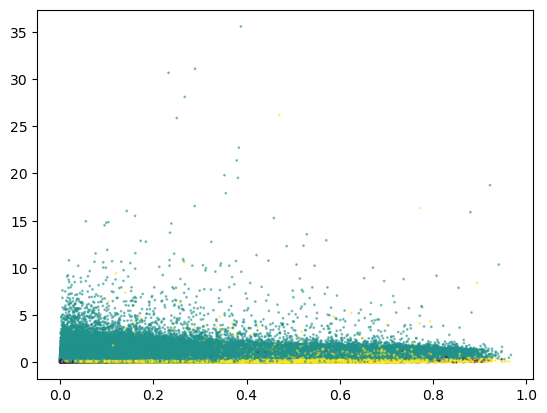

In [13]:
# slow delta vs RMS for each sleep stage
plt.scatter(df_new['slowdelta'], df_new['rms'], c=df_new['sleepstage'], cmap='viridis', alpha=0.5, s=1)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)
# clip the values to be between -3 and 3
X_new = np.clip(X_new, -3, 3)

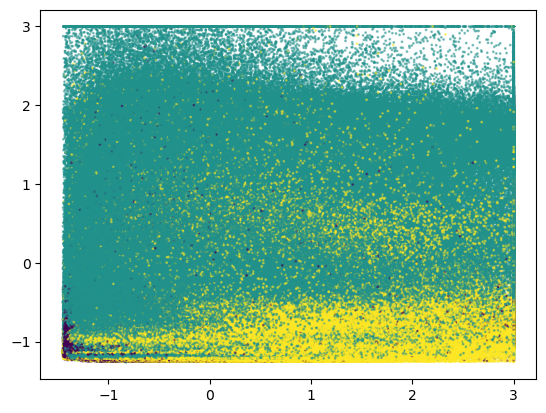

In [15]:
# slow delta vs RMS for each sleep stage
plt.scatter(X_new[:,0], X_new[:,6], c=y_new, cmap='viridis', alpha=0.5, s=1)
plt.show()

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Do PCA on the standardized features
pca = PCA(n_components=7)
# PCA
X_pca = pca.fit_transform(X_new)

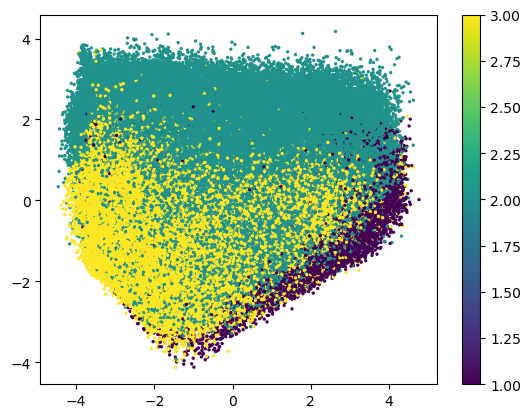

In [17]:
# plot
# Sleepstages, 1: WAKE, 2: NREM, 3: REM
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_new['sleepstage'], cmap='viridis', s=2)
plt.colorbar()
plt.show()

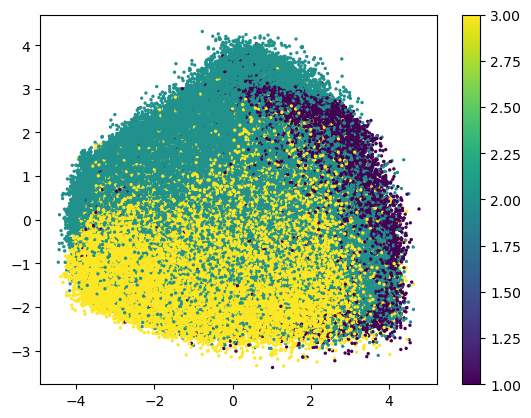

In [18]:
# pca 1 and 3
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=df_new['sleepstage'], cmap='viridis', s=2)
plt.colorbar()
plt.show()

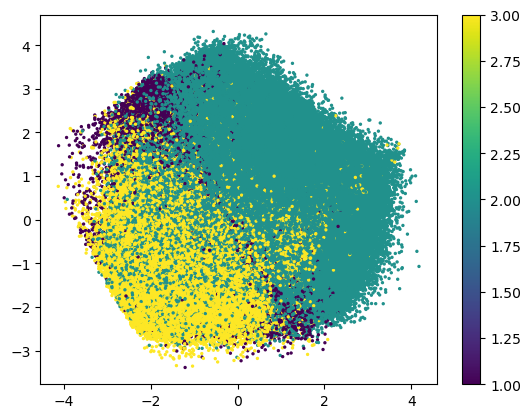

In [19]:
# pca 1 and 3
plt.scatter(X_pca[:, 1], X_pca[:, 2], c=df_new['sleepstage'], cmap='viridis', s=2)
plt.colorbar()
plt.show()

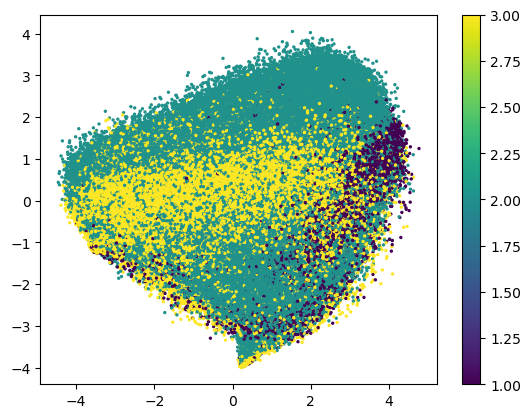

In [20]:
# pca 1 and 4
plt.scatter(X_pca[:, 0], X_pca[:, 3], c=df_new['sleepstage'], cmap='viridis', s=2)
plt.colorbar()
plt.show()

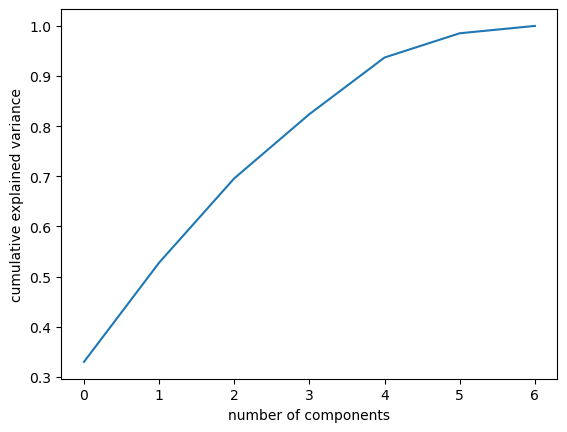

In [21]:
# Show cum explained variance on plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

e:\Anaconda\envs\reinforcement\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


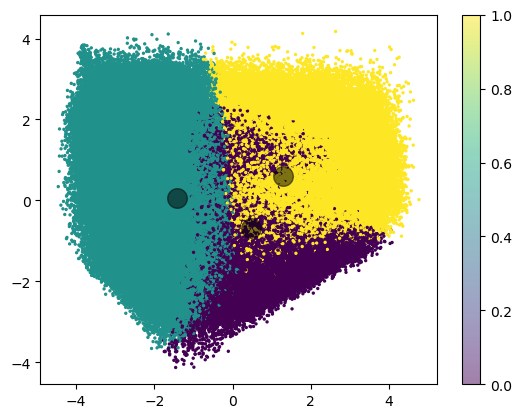

In [22]:
# do Kmeans on the PCA
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

# plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.colorbar()

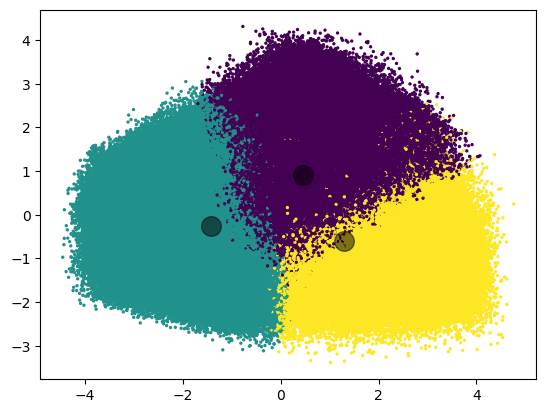

In [23]:
# show prediction on pca 1 and 3
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=y_kmeans, s=2, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5)
plt.show()

In [24]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df_new['sleepstage'], y_kmeans)
print(f'Accuracy: {accuracy}')

Accuracy: 0.19787661792859182
